In [1]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
#df = pd.read_csv("../../data/data7size5.csv")
df = pd.read_csv("../../DataCSV/dataset7.csv")
print(df[df['class']==0].shape[0])
print(df[df['class']==1].shape[0])
print(df[df['class']==2].shape[0])
print(df[df['class']==3].shape[0])
print(df[df['class']==4].shape[0])
print(df[df['class']==5].shape[0])
print(df[df['class']==6].shape[0])
y = df['class']

36718
916
19728
26605
159
5910
4499


In [2]:
def under_sampling():
    pass

In [3]:
img_list = []
size = 64
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [4]:
np.save("X_train",np.array(X_train))
np.save("X_val",np.array(X_val))
np.save("X_test",np.array(X_test))
np.save("y_train",np.array(y_train))
np.save("y_val",np.array(y_val))
np.save("y_test",np.array(y_test))

In [7]:
from tensorflow.keras.utils import to_categorical
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),7),to_categorical((np.array(y_val)),7),to_categorical((np.array(y_test)),7)

In [8]:
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys
def model_build():
    size = 64
    factor=1e-5
    model = models.Sequential()
    model.add(layers.Conv2D(8, (5, 5), activation='relu', kernel_regularizer=l1(factor),input_shape=(size, size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))


    model.add(layers.Conv2D(16, (5, 5), activation='relu',kernel_regularizer=l1(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l1(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l1(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu',kernel_regularizer=l1(factor)))
    model.add(layers.Dense(128, activation='relu',kernel_regularizer=l1(factor)))
    
    model.add(layers.Dense(7, activation='softmax'))
    #model.summary()
    return model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
model = model_build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 8)         608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          1

In [9]:
from tensorflow.python.keras.callbacks import TensorBoard
model = model_build()
model.compile(
   optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#tsb = TensorBoard(log_dir='./logs')
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(X_val,y_val))

Epoch 1/20
591/591 [==============================] - 28s 46ms/step - loss: 1.3362 - accuracy: 0.4981 - val_loss: 1.1429 - val_accuracy: 0.6188
Epoch 2/20
591/591 [==============================] - 26s 45ms/step - loss: 1.0699 - accuracy: 0.6438 - val_loss: 1.0437 - val_accuracy: 0.6563
Epoch 3/20
591/591 [==============================] - 26s 44ms/step - loss: 1.0543 - accuracy: 0.6513 - val_loss: 1.0310 - val_accuracy: 0.6688
Epoch 4/20
591/591 [==============================] - 26s 44ms/step - loss: 1.0286 - accuracy: 0.6703 - val_loss: 1.0301 - val_accuracy: 0.6765
Epoch 5/20
591/591 [==============================] - 26s 44ms/step - loss: 1.0272 - accuracy: 0.6766 - val_loss: 1.0442 - val_accuracy: 0.6765
Epoch 6/20
591/591 [==============================] - 27s 45ms/step - loss: 1.0333 - accuracy: 0.6830 - val_loss: 1.0674 - val_accuracy: 0.6790
Epoch 7/20
591/591 [==============================] - 26s 44ms/step - loss: 1.0398 - accuracy: 0.6887 - val_loss: 1.1143 - val_accuracy:

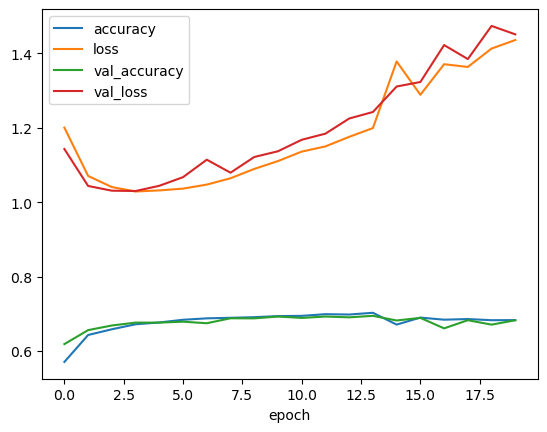

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [11]:
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4577797651290894
Test accuracy: 0.6809478402137756
